<a href="https://colab.research.google.com/github/paulalias452/Deep-Learning-Assignments/blob/main/Transfer_Learning_Res_Net_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning

30/7/2022

In [ ]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D,\
Dropout, Flatten, Dense, Activation, \
BatchNormalization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, \
Dropout, Flatten, Dense, Activation, \
BatchNormalization

import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


#Split data

In [ ]:
img_height, img_width = 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
!find data_dir

find: ‘data_dir’: No such file or directory


In [ ]:
classnames = train_ds.class_names
classnames

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
roses_img =list(data_dir.glob("roses/*"))

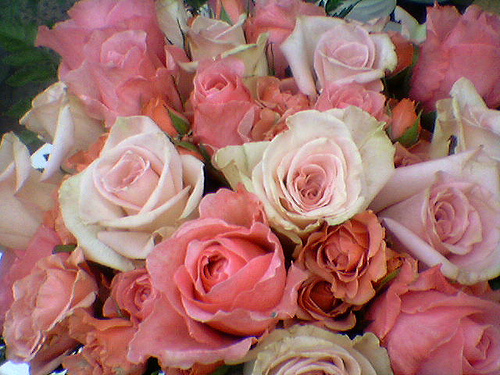

In [ ]:
PIL.Image.open(str(roses_img[90]))# can work without str also

In [ ]:
dandelion_img =list(data_dir.glob("dandelion/*"))

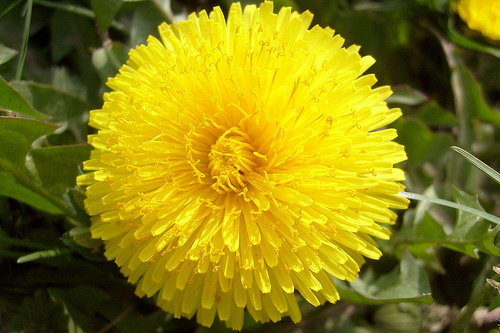

In [ ]:
PIL.Image.open(str(dandelion_img[71]))

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed =123,
    image_size=(img_height,img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


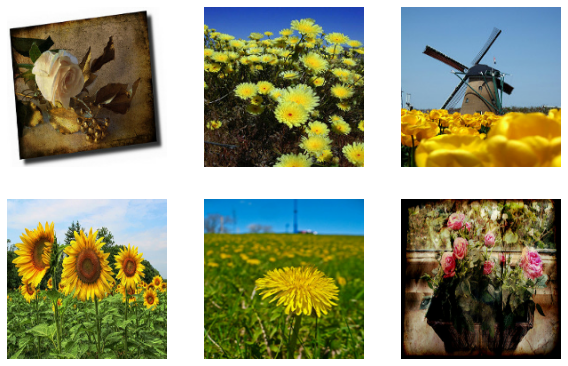

In [ ]:
# Visualize the data
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

#Res Net Model

In [ ]:
from keras.models import Sequential
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape = (180,180,3),
                                                  pooling='avg',classes= 5,
                                                  weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
for layer in pretrained_model.layers:
  layer.trainable = False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# multi-class classification- use categorical_crossentropy
# If it doesn't work, use sparse_categorical_crossentropy instead

resnet_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
92/92 [==============================] - 384s 4s/step - loss: 0.6998 - accuracy: 0.7738 - val_loss: 0.3794 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 376s 4s/step - loss: 0.2863 - accuracy: 0.8954 - val_loss: 0.4765 - val_accuracy: 0.8270
Epoch 3/10
92/92 [==============================] - 374s 4s/step - loss: 0.1569 - accuracy: 0.9455 - val_loss: 0.4642 - val_accuracy: 0.8542
Epoch 4/10
92/92 [==============================] - 375s 4s/step - loss: 0.0929 - accuracy: 0.9690 - val_loss: 0.4022 - val_accuracy: 0.8665
Epoch 5/10
92/92 [==============================] - 374s 4s/step - loss: 0.0625 - accuracy: 0.9819 - val_loss: 0.3860 - val_accuracy: 0.8787
Epoch 6/10
92/92 [==============================] - 373s 4s/step - loss: 0.0326 - accuracy: 0.9925 - val_loss: 0.4602 - val_accuracy: 0.8801
Epoch 7/10
92/92 [==============================] - 372s 4s/step - loss: 0.0163 - accuracy: 0.9983 - val_loss: 0.4038 - val_accuracy: 0.8760
Epoch 8/10
92

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive

MyDrive  Shareddrives


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/')

In [ ]:
path = F"/content/gdrive/MyDrive/flower_model.h5"
resnet_model.save(path)

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Images/flower")

In [ ]:
import numpy as np
results = {
    0:'daisy',
    1:'dandelion',
    2:'roses',
    3:'sunflower',
    4:'tulips'
}
from PIL import Image
#im = Image.open("/content/gdrive/MyDrive/images/dog.104.jpg")
im = Image.open("/content/gdrive/MyDrive/Images/flower/rose1.jpg")
Image_Width = 180
Image_Height = 180
Image_Size = (Image_Width, Image_Height)
im = im.resize(Image_Size)
im = np.expand_dims(im, axis = 0)
im = np.array(im)
im = im/255
# pred = model.predict_classes([im])[0]
# Old version has predict_classes and new version only has predict
pred = resnet_model.predict([im])[0]
result = results[np.argmax(pred)]
print("Predictions = ", pred)
print("The resulted image is of a", result)

Predictions =  [0.11939434 0.11068907 0.49626157 0.01176764 0.26188746]
The resulted image is of a roses
